## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata_df = pd.DataFrame(mouse_metadata)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results_df = pd.DataFrame(study_results)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mousedata_studyresults_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

# Display the data table for preview
mousedata_studyresults_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_count = len(mousedata_studyresults_df["Mouse ID"].unique())
mice_count 

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
mousedata_studyresults_duplicates_df = mousedata_studyresults_df.loc[mousedata_studyresults_df.duplicated(), "Mouse ID"]
mousedata_studyresults_duplicates_df

909    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
mouse_data_duplicate_data = mousedata_studyresults_df.loc[mousedata_studyresults_df["Mouse ID"] == "g989"]
mouse_data_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
mousedata_studyresults_new_df = mousedata_studyresults_df.set_index("Mouse ID")
mousedata_studyresults_new_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
mousedata_studyresults_clean_new_df = mousedata_studyresults_new_df.drop(index = "g989")
mousedata_studyresults_clean_new_df = mousedata_studyresults_clean_new_df.reset_index()
mousedata_studyresults_clean_new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(mousedata_studyresults_clean_new_df["Mouse ID"].unique())
mice_count_clean

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
combined_data_mean= mousedata_studyresults_clean_new_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
combined_data_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
combined_data_median = mousedata_studyresults_clean_new_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
combined_data_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
combined_data_var = mousedata_studyresults_clean_new_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
combined_data_var



Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
combined_data_std = mousedata_studyresults_clean_new_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
combined_data_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
combined_data_SEM = mousedata_studyresults_clean_new_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
combined_data_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
combined_data_df = pd.DataFrame({"MEAN": combined_data_mean, "MEDIAN": combined_data_median, "VARIANCE": combined_data_var, "STANDARD DEVIATION": combined_data_std, "STANDARD OF ERROR": combined_data_SEM})
combined_data_df.head()

,MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,STANDARD OF ERROR
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line

mean = combined_data_df["MEAN"].mean()
median = combined_data_df["MEDIAN"].mean()
variance = combined_data_df["VARIANCE"].mean()
standard_dev = combined_data_df["STANDARD DEVIATION"].mean()
standard_error = combined_data_df["STANDARD OF ERROR"].mean()

aggregation_df = pd.DataFrame({"MEAN": [mean], "MEDIAN": [median], "VARIANCE": [variance], "STANDARD DEVIATION": [standard_dev], "STANDARD OF ERROR": [standard_error]})
aggregation_df

,MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,STANDARD OF ERROR
0,50.975982,49.902123,47.85844,6.821103,0.502785


In [18]:
aggregated_df = combined_data_df.mean(axis='rows')
aggregated_df

MEAN                  50.975982
MEDIAN                49.902123
VARIANCE              47.858440
STANDARD DEVIATION     6.821103
STANDARD OF ERROR      0.502785
dtype: float64

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = mousedata_studyresults_clean_new_df["Drug Regimen"].unique()
total_measurements

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [20]:
total_measurement_regimens = pd.Series(total_measurements)
total_measurement_regimens

0     Ramicane
1    Capomulin
2    Infubinol
3      Placebo
4     Ceftamin
5     Stelasyn
6    Zoniferol
7     Ketapril
8     Propriva
9     Naftisol
dtype: object

In [21]:
total_measurements_regimen_counts = mousedata_studyresults_clean_new_df["Drug Regimen"].value_counts()
total_measurements_regimen_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Times Each Drug was Administered')

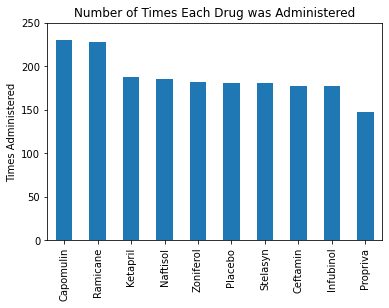

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_plot = total_measurements_regimen_counts.plot(kind="bar")
drug_regimen_plot.set_ylim(0, 250)
drug_regimen_plot.set_ylabel("Times Administered")
drug_regimen_plot.set_title("Number of Times Each Drug was Administered") 

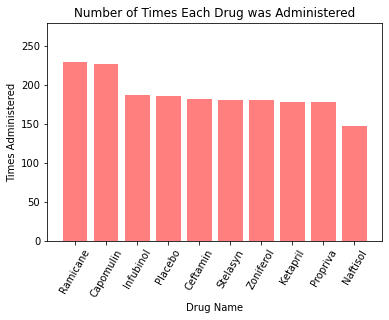

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(total_measurement_regimens, total_measurements_regimen_counts, color="r", alpha=0.5, align="center")
plt.ylim(0, max(total_measurements_regimen_counts)+50)
plt.title("Number of Times Each Drug was Administered")
plt.xlabel("Drug Name")
plt.ylabel("Times Administered")
plt.xticks(rotation = 60)
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_counts = mousedata_studyresults_clean_new_df["Sex"].value_counts()
mouse_sex_counts

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Mice: Males vs Females')

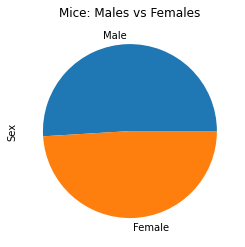

In [25]:
mouse_sex_counts_chart = mouse_sex_counts.plot(kind= "pie", y= "Sex")
mouse_sex_counts_chart.set_title("Mice: Males vs Females")

(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

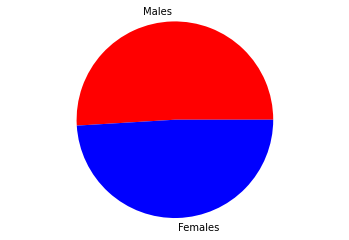

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Females"]
values = mouse_sex_counts
plt.pie(values, labels=labels,colors=("red", "blue"))
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [28]:
mousedata_studyresults_clean_new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
mousedata_studyresults_clean_new_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [30]:
mousedata_studyresults_clean_new_df["Timepoint"] = mousedata_studyresults_clean_new_df.loc[:, "Timepoint"].astype(float)
mousedata_studyresults_clean_new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0.0,45.000000,0
1,k403,Ramicane,Male,21,16,5.0,38.825898,0
2,k403,Ramicane,Male,21,16,10.0,35.014271,1
3,k403,Ramicane,Male,21,16,15.0,34.223992,1
4,k403,Ramicane,Male,21,16,20.0,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25.0,63.145652,2
1876,z969,Naftisol,Male,9,30,30.0,65.841013,3
1877,z969,Naftisol,Male,9,30,35.0,69.176246,4
1878,z969,Naftisol,Male,9,30,40.0,70.314904,4


In [31]:
final_tumor_time = mousedata_studyresults_clean_new_df.groupby(["Mouse ID"])
final_tumor_time_series = final_tumor_time["Timepoint"].max()
final_tumor_time_series 

Mouse ID
a203    45.0
a251    45.0
a262    45.0
a275    45.0
a366    30.0
        ... 
z435    10.0
z578    45.0
z581    45.0
z795    45.0
z969    45.0
Name: Timepoint, Length: 248, dtype: float64

In [32]:
final_tumor_time_series = final_tumor_time_series.reset_index()
final_tumor_time_series

,Mouse ID,Timepoint
0,a203,45.0
1,a251,45.0
2,a262,45.0
3,a275,45.0
4,a366,30.0
...,...,...
243,z435,10.0
244,z578,45.0
245,z581,45.0
246,z795,45.0


In [33]:
tumor_df = pd.merge(final_tumor_time_series, mousedata_studyresults_clean_new_df, on=["Mouse ID", "Timepoint"], how="inner")
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20,23,67.973419,2
1,a251,45.0,Infubinol,Female,21,25,65.525743,1
2,a262,45.0,Placebo,Female,17,29,70.717621,4
3,a275,45.0,Ceftamin,Female,20,28,62.999356,3
4,a366,30.0,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10.0,Propriva,Female,12,26,48.710661,0
244,z578,45.0,Ramicane,Male,11,16,30.638696,0
245,z581,45.0,Infubinol,Female,24,25,62.754451,3
246,z795,45.0,Naftisol,Female,13,29,65.741070,3


In [34]:
tumor_by_drug_regimen = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]


In [35]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. (use for loop)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset (append the series from loc into empty tumor volume list)
    
    
    # Determine outliers using upper and lower bounds

treatments= []

for treatment in tumor_by_drug_regimen:
    drug_list = tumor_df.loc[tumor_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    treatments.append(drug_list)

    quartiles = drug_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_treatments = drug_list.loc[(drug_list < lower_bound) | (drug_list > upper_bound)]
    print(outlier_treatments)
    

 

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


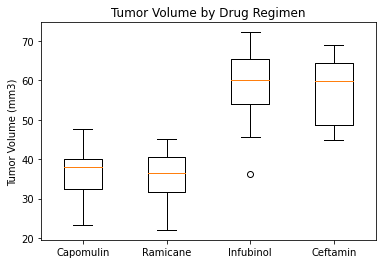

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(treatments)
ax1.set_xticklabels(("Capomulin","Ramicane", "Infubinol", "Ceftamin"))
plt.show()

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_tumors = mousedata_studyresults_clean_new_df.loc[mousedata_studyresults_clean_new_df["Drug Regimen"] == "Capomulin",:]
capomulin_tumors.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0.0,45.000000,0
11,s185,Capomulin,Female,3,17,5.0,43.878496,0
12,s185,Capomulin,Female,3,17,10.0,37.614948,0
13,s185,Capomulin,Female,3,17,15.0,38.177232,0
14,s185,Capomulin,Female,3,17,20.0,36.866876,0


In [38]:
tumor_time_s185 = capomulin_tumors.loc[capomulin_tumors["Mouse ID"] == "s185", :]
tumor_time_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0.0,45.000000,0
11,s185,Capomulin,Female,3,17,5.0,43.878496,0
12,s185,Capomulin,Female,3,17,10.0,37.614948,0
13,s185,Capomulin,Female,3,17,15.0,38.177232,0
14,s185,Capomulin,Female,3,17,20.0,36.866876,0
15,s185,Capomulin,Female,3,17,25.0,33.949940,0
16,s185,Capomulin,Female,3,17,30.0,32.959671,1
17,s185,Capomulin,Female,3,17,35.0,28.328531,1
18,s185,Capomulin,Female,3,17,40.0,25.472143,1
19,s185,Capomulin,Female,3,17,45.0,23.343598,1


In [41]:
tumor_time_s185.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint             float64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

Text(0.5, 1.0, 'Tumor Growth over Time in Mouse s185')

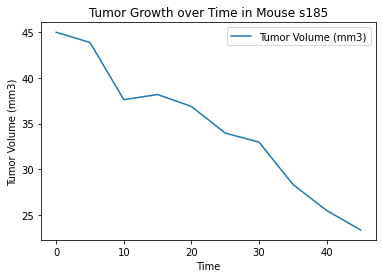

In [43]:
tumor_time_s185.plot(x = "Timepoint", y = "Tumor Volume (mm3)")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Growth over Time in Mouse s185")

## Line and Scatter Plots

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [46]:
average_tumor_volume = capomulin_tumors.groupby(["Tumor Volume (mm3)"])
average_tumor_volume_new = average_tumor_volume.mean()
average_tumor_volume_new

,Age_months,Weight (g),Timepoint,Metastatic Sites
Tumor Volume (mm3),,,,
23.343598,3.0,17.0,45.0,1.0
25.472143,3.0,17.0,40.0,1.0
28.167397,16.0,15.0,40.0,0.0
28.328531,3.0,17.0,35.0,1.0
28.430964,22.0,17.0,45.0,1.0
...,...,...,...,...
47.373423,12.0,25.0,15.0,0.0
47.488599,17.0,21.0,15.0,1.0
47.685963,1.0,24.0,45.0,1.0


In [47]:
tumor_by_weight = average_tumor_volume_new.reset_index()
tumor_by_weight

,Tumor Volume (mm3),Age_months,Weight (g),Timepoint,Metastatic Sites
0,23.343598,3.0,17.0,45.0,1.0
1,25.472143,3.0,17.0,40.0,1.0
2,28.167397,16.0,15.0,40.0,0.0
3,28.328531,3.0,17.0,35.0,1.0
4,28.430964,22.0,17.0,45.0,1.0
...,...,...,...,...,...
201,47.373423,12.0,25.0,15.0,0.0
202,47.488599,17.0,21.0,15.0,1.0
203,47.685963,1.0,24.0,45.0,1.0
204,48.070452,17.0,21.0,20.0,2.0


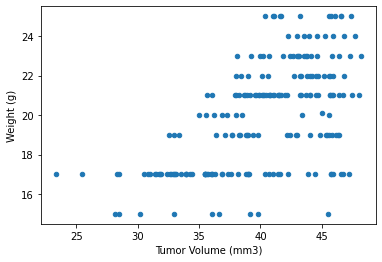

In [50]:
plot = tumor_by_weight.plot.scatter("Tumor Volume (mm3)", "Weight (g)")
plt.show()

## Correlation and Regression

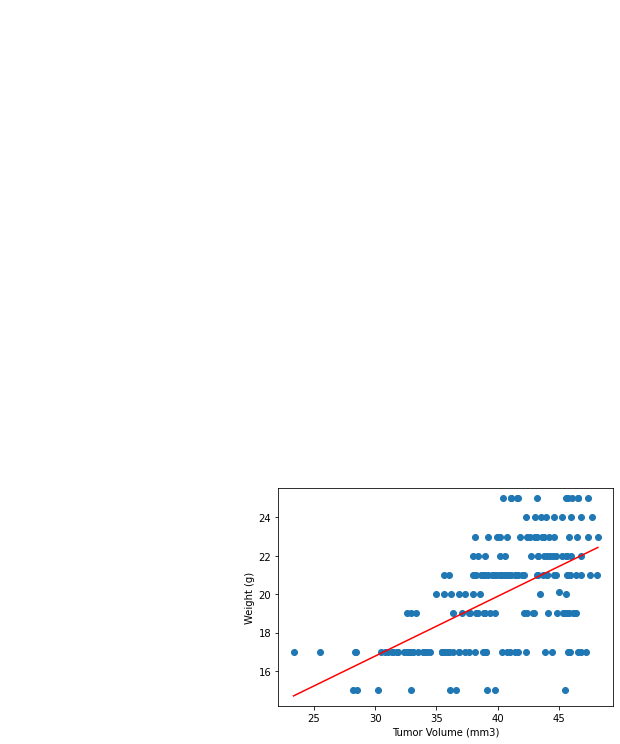

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = tumor_by_weight.iloc[:,0]
y_values = tumor_by_weight.iloc[:,2]
(slope, intercept, r_value, p_value, slope_std_error) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()



In [52]:
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.3350069384102088
